# Final Project Personal Notebook 

## Data Set: Police Incident Blotter -https://data.wprdc.org/dataset/police-incident-blotter

#### Notebook by: Yassir Abdalla

## Neighborhoods with the best/worst in crime incidents

In [19]:
import pandas as pd
plotter=pd.read_csv("IncidentPlotter.csv")
del plotter["PK"]
del plotter["CCR"]
del plotter["HIERARCHY"]
query_mask= plotter["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
plotter.dropna(subset=["INCIDENTNEIGHBORHOOD"],inplace=True)
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside State"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside County"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside City"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Mt. Oliver Boro"]

plotter.sample(100)


,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
2362,2022-03-25T16:26:00,"700 Block Industry St Pittsburgh, PA 15210",N,Allentown,3,99,9993 PFA Service with Weapons Supplement,1803.0,3.0,5.0,-79.995763,40.420781
1902,2022-04-01T23:00:00,"600 Block Gearing Ave Pittsburgh, PA 15210",N,Beltzhoover,3,99,9999 9999 - (Misc. Incident): Civil Matter,1809.0,3.0,5.0,-80.005042,40.417085
1599,2022-04-17T23:00:00,"Sunrise Ave & Robinson Blvd Pittsburgh, PA 15221",N,East Hills,5,AGG-ASSAULT,2702 Aggravated Assault. / 2701(a)(1) Simple A...,1306.0,9.0,2.0,-79.868270,40.451122
2509,2022-04-06T20:08:00,"Oakwood Rd & Bennett St Pittsburgh, PA 15208",Y,East Hills,5,TERRORISTIC THREATS,2709 Harassment (Non-Specific) / 2706 Terroris...,1306.0,9.0,2.0,-79.885652,40.454034
2705,2022-03-27T11:27:00,"3700 Block Atkins St Pittsburgh, PA 15212",N,Brighton Heights,1,THEFT FROM AUTO,3934 Theft from Vehicle,2708.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104,2022-03-26T16:30:00,"1400 Block Geyer Ave Pittsburgh, PA 15212",N,Marshall-Shadeland,1,DEAD ON ARRIVAL (DOA),9496 Dead on Arrival (DOA),2715.0,NaN,NaN,NaN,NaN
2150,2022-04-05T08:56:00,"4900 Block 5th Ave Pittsburgh, PA 15213",N,Shadyside,4,99,9999 9999 - (Misc. Incident):,709.0,8.0,3.0,-79.944131,40.447300
1312,2022-04-09T00:31:00,"2100 Block Webster Ave Pittsburgh, PA 15219",N,Middle Hill,2,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,501.0,NaN,NaN,NaN,NaN
542,2022-04-06T18:00:00,"1200 Block Western Ave Pittsburgh, PA 15233",N,Chateau,1,DRUG INVESTIGATION,9124 Drug Investigation,2108.0,6.0,1.0,-80.021968,40.451218


From the data set we can conclude which neighbor hoods would technically be considered the most "dangerous" to live in.

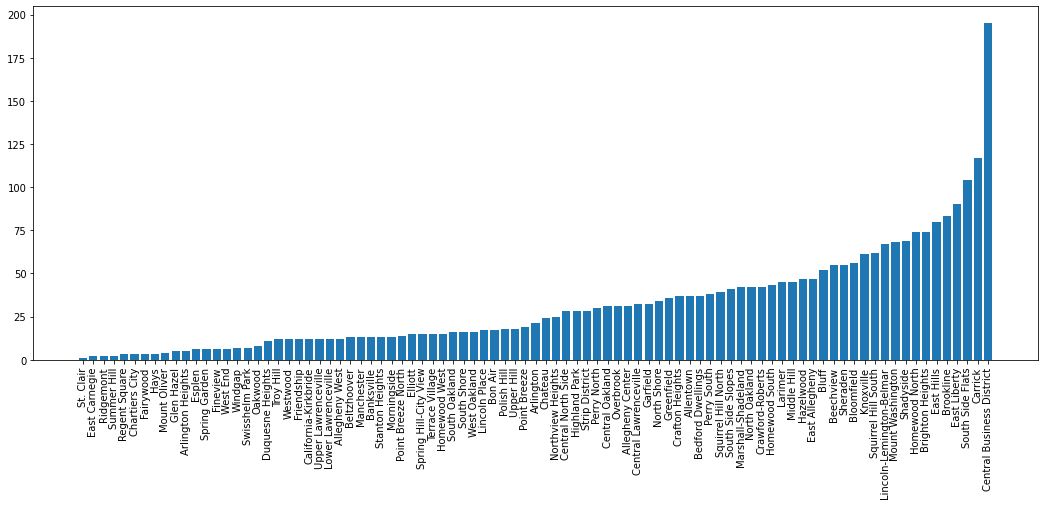

In [20]:
import operator
import matplotlib.pyplot as hero
d=dict()
villian=plotter["INCIDENTNEIGHBORHOOD"].values.tolist()
for x in range(len(villian)):
    if villian[x] in d.keys():
        d[villian[x]]=d[villian[x]]+1
    else:
        d[villian[x]]=1
dsort=sorted(d.items(), key=operator.itemgetter(1))
names, data = zip(*dsort)
hero.figure(figsize=(18,6.5))
hero.bar(names, data)
hero.xticks(rotation=90)
hero.show()

BEST 3 Neighborhoods for an alien to enhabit ACCORDING TO THE METRIC:
* St.Clair
* East Carnegie
* Ridgemont

WORST 3 Neighborhoods for an alien to enhabit ACCORDING TO THE METRIC

* Central Buisness District
* Carrick
* South Side Flats